Found 160 files


/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_17948/550764872.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "v-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stab, sim_times_stab, "v-", label="STABSim (This Work)", linestyle="-", color="red", markersize=6)
/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_17948/550764872.py:65: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ">-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=6)
/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_17948/550764872.py:66: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "<-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_q

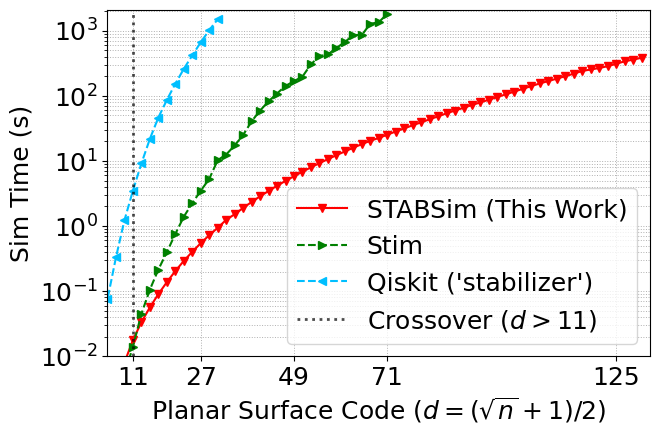

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set universal font sizes
plt.rcParams.update({
    'font.size': 18,          # Default font size
    # 'axes.titlesize': 20,     # Title font size
    # 'axes.labelsize': 18,     # Axis label font size
    # 'xtick.labelsize': 16,    # X-axis tick label size
    # 'ytick.labelsize': 16,    # Y-axis tick label size
    # 'legend.fontsize': 16,    # Legend font size
})

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "distance", "rounds", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return sorted(all_data, key=lambda x: x["distance"])  # Sort by sim_time

def plot_data(all_data):
    sim_times_stab = []
    sim_times_stim = []
    distance_stab = []
    distance_stim = []
    sim_times_cpu = []
    distance_cpu = []
    sim_times_qiskit= []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu" and data["sim_time"]< 1900:
            distance_stab.append(float(data["distance"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim" and data["sim_time"] < 1900:
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        # elif data["sim_name"] == "cpu" and data["sim_time"] < 1300:
        #     distance_cpu.append(float(data["distance"]))
        #     sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit" and data["sim_time"]< 2000:
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))



    plt.figure(figsize=(7, 4.5))  # Change these numbers to adjust size

    plt.plot(distance_stab, sim_times_stab, "v-", label="STABSim (This Work)", linestyle="-", color="red", markersize=6)
    # plt.plot(distance_cpu, sim_times_cpu, "^-", label="STAB-CPU", linestyle="-", color="orange", markersize=5)
    plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=6)
    plt.plot(distance_qiskit, sim_times_qiskit, "<-", label="Qiskit ('stabilizer')", linestyle="--", color="deepskyblue", markersize=6)

    # Find where STAB-GPU overtakes Stim
    crossover_distance = None
    if len(distance_stab) > 5 and len(distance_stim) > 5:
        # Find the crossover point by comparing interpolated values
        min_dist = max(min(distance_stab), min(distance_stim))
        max_dist = min(max(distance_stab), max(distance_stim))
        
        # Check distances in the overlapping range
        for d in range(int(min_dist), int(max_dist) + 1):
            # Find closest points for interpolation
            stab_times_at_d = []
            stim_times_at_d = []
            
            for i, dist in enumerate(distance_stab):
                if abs(dist - d) < 2:  # Within 2 units
                    stab_times_at_d.append(sim_times_stab[i])
            
            for i, dist in enumerate(distance_stim):
                if abs(dist - d) < 2:  # Within 2 units
                    stim_times_at_d.append(sim_times_stim[i])
            
            if stab_times_at_d and stim_times_at_d:
                avg_stab = np.mean(stab_times_at_d)
                avg_stim = np.mean(stim_times_at_d)
                
                if avg_stab < avg_stim and crossover_distance is None:
                    crossover_distance = d
                    break
    
    # Add vertical line at crossover point
    if crossover_distance:
        plt.axvline(x=11, color='black', linestyle=':', alpha=0.7, linewidth=2, 
                   label=r'Crossover ($d>11$)')

    # Increase font size for axis labels and title
    plt.xlabel(r"Planar Surface Code ($d=(\sqrt{n}+1)/2$)")
    plt.ylabel("Sim Time (s)")
    # plt.title("Planar Surface Code Memory in Stabilizer Simulation", fontsize=22)
    
    # Increase font size for ticks


    # Set the x-axis to log2 scale
    plt.ylim(.01, 2100)
    plt.xlim(5, 133)
    plt.yscale("log")
    # plt.xscale("log", base=2)

    
    # Only show the x-axis ticks for 5, 15, 51, and 99 on the log2 scale
    plt.xticks([11, 27, 49, 71, 125], labels=[str(x) for x in [11, 27, 49, 71, 125]])

    # Increase font size for the legend
    plt.legend(loc='lower right')

    plt.grid(True, linestyle=":", linewidth=0.7, which="both")

    # Adjust layout to cut off some whitespace
    # plt.subplots_adjust(top=0.95, right=0.95)

    # Save the plot as a PDF
    plt.savefig("graphics/fowler_improved.pdf", format="pdf", dpi=1000, bbox_inches='tight')

    plt.show()

folder_path = "fowler_improved"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)


/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_14746/1387651703.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ">-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(distance_stim, sim_times_stim, ">-", label="Stim",
/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_14746/1387651703.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "<-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(distance_qiskit, sim_times_qiskit, "<-", label="Qiskit (method='stabilizer')",


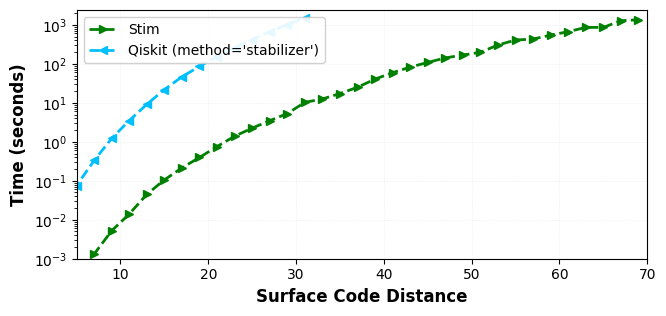

In [4]:
# Create a mini figure emphasizing poor scaling of Stim and Qiskit
def create_scaling_mini_figure(all_data):
    # Extract data - only Stim and Qiskit
    sim_times_stim = []
    sim_times_qiskit = []
    distance_stim = []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "stim" and data["sim_time"] < 1500:
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit" and data["sim_time"] < 1500:
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))

    # Create a very compact figure focused on scaling
    fig, ax = plt.subplots(figsize=(7, 3.5))
    
    # Use original plot color scheme
    ax.plot(distance_stim, sim_times_stim, ">-", label="Stim", 
            linewidth=2, color="green", markersize=6, linestyle="--")
    ax.plot(distance_qiskit, sim_times_qiskit, "<-", label="Qiskit (method='stabilizer')", 
            linewidth=2, color="deepskyblue", markersize=6, linestyle="--")

    # Focus on the scaling region with log y-axis to show exponential scaling
    ax.set_xlim(5, 70)
    ax.set_ylim(0.001, 2400)
    ax.set_yscale("log")
    
    # Minimal, clean labeling
    ax.set_xlabel("Surface Code Distance", fontsize=12, fontweight='bold')
    ax.set_ylabel("Time (seconds)", fontsize=12, fontweight='bold')
    
    # Clean legend
    ax.legend(fontsize=10, loc='upper left', framealpha=0.9)
    
    # Minimal grid
    ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
    
    # Clean ticks
    ax.tick_params(labelsize=10)
    
    plt.tight_layout()
    
    # Save the mini scaling figure
    plt.savefig("graphics/scaling_comparison_mini.pdf", format="pdf", dpi=300, bbox_inches='tight')
    
    plt.show()

# Generate the scaling comparison mini figure
create_scaling_mini_figure(all_data)